In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.03, 'Figure Title')

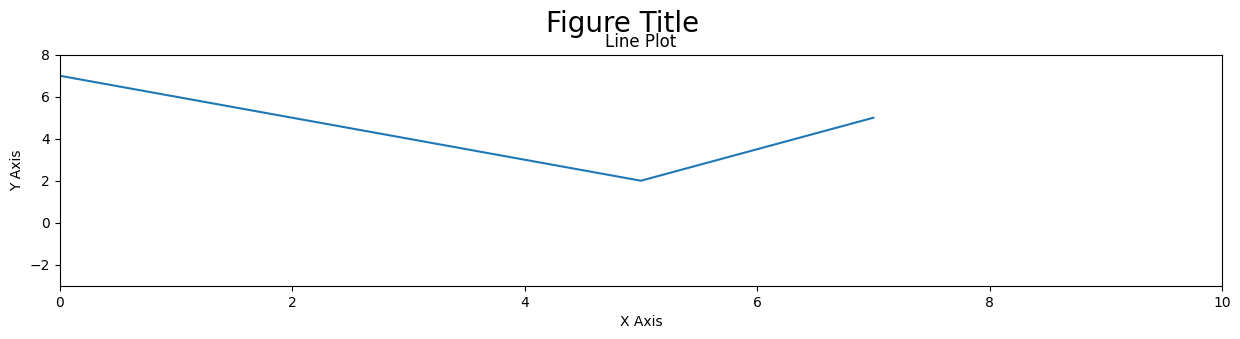

In [ ]:
x = [-3,5,7]
y= [10, 2, 5]

plt.figure(figsize=(15,3))
plt.plot(x,y)
plt.xlim(0,10)
plt.ylim(-3,8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)

matplotlib.axes._axes.Axes

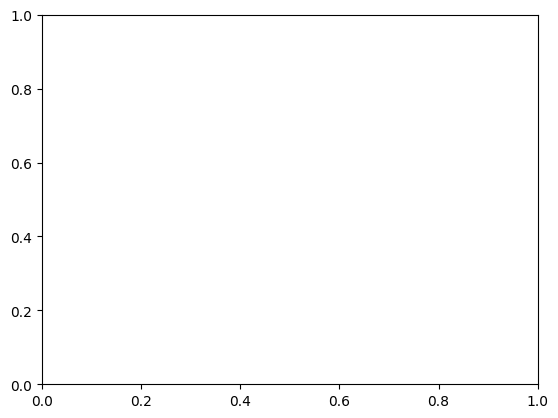

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
type(fig)
type(ax)

           Apples  Oranges
Atiya          20       35
Abbas          10       40
Cornelia       40       25
Stephanie      20       19
Monte          50       33


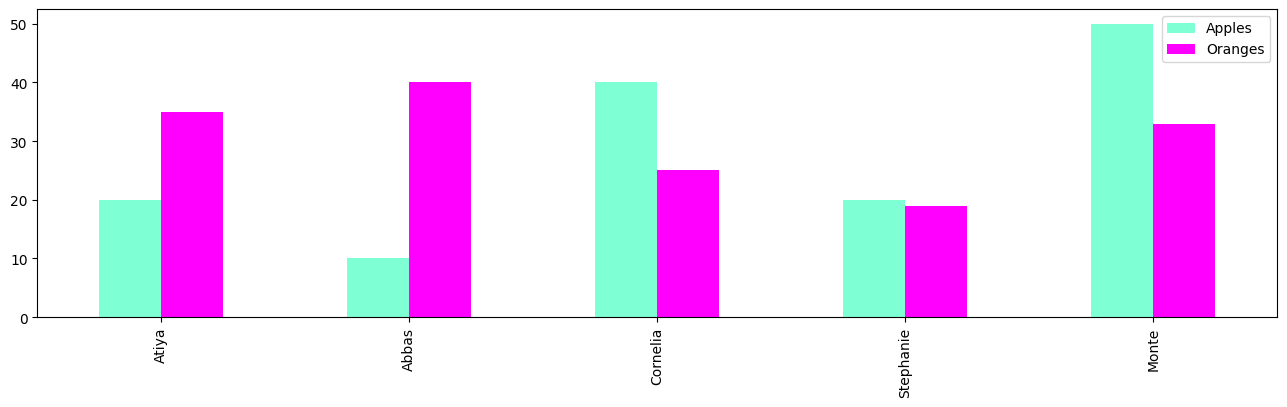

In [ ]:
df = pd.DataFrame(index=['Atiya','Abbas','Cornelia','Stephanie','Monte'],
                  data={'Apples':[20,10,40,20,50],
                        'Oranges':[35,40,25,19,33]})
print(df)

color = ['aquamarine','magenta'] #color
df.plot(kind='bar',color=color, figsize=(16,4))
plt.show()


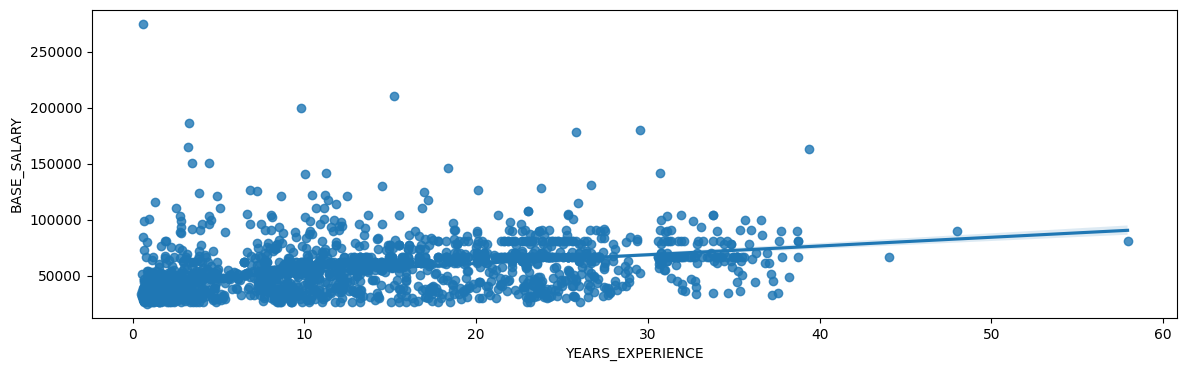

In [ ]:
import seaborn as sns

employee = pd.read_csv('employee.csv', parse_dates=['HIRE_DATE', 'JOB_DATE',]) #parse differs based on the 값
days_hired = (pd.to_datetime('2016-12-01')- employee['HIRE_DATE']).dt.days
employee['YEARS_EXPERIENCE'] = days_hired / 365.25

ax = sns.regplot(x='YEARS_EXPERIENCE', y = 'BASE_SALARY', data=employee) #regression plot
ax.figure.set_size_inches(14,4)
plt.show()


In [ ]:
flights = pd.read_csv('flights.csv')

flights.head()
#bringing out arr_delay column
flights['ARR_DELAY'].ge(15).astype(int)
#.ge() = greater than or equal
#if teh delay is greater than or equal to 15 True/False ==> .astype(int) 1/0

,ARR_DELAY
0,1
1,0
2,1
3,0
4,1
...,...
58487,0
58488,0
58489,0
58490,1


In [ ]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
flights['ON_TIME']=1-flights[cols].any(axis=1)
cols.append('ON_TIME')
status = flights[cols].sum()
status

,0
DIVERTED,137
CANCELLED,881
DELAYED,11685
ON_TIME,45789


In [ ]:
fig, ax_array = plt.subplots(2,3,figsize=(18,8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)
ac = flights['AIRLINE'].value_counts()
ac.plot(kind='barh', ax=ax1, title = 'Airline')

#횟수 =flights[].value_counts()
#new bar graph, ax2, x = rot = 0, titile 'Origin City'
oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar', ax=ax2, title = 'Origin City',rot=0)


#도착  , .head(10)
#bar graph ax3, title='Destination City'

ac = flights['DEST_AIR'].value_counts().head(10)
ac.plot(kind='bar', ax=ax3, title = 'Destination City',rot=0)
#도착  , .head(10)
#bar graph ax3, title='Destination City'

status.plot(kind='bar', ax=ax4, rot=0, log=True, title='Flight Status')

flights['DIST'].plot(kind='kde', ax=ax5, xlim=(0,3000),
                     title='Disstance KDE')

#kind = hist
#ax 6
#title = arrival delay
#range 0,200
flights['DIST'].plot(kind='hist', ax=ax6, range = (0,200),
                     title='arrival delay')

NameError: name 'plt' is not defined

In [ ]:
#use // and %
#grab SCHED_DEP, calculate hour and minute

hours = flights['SCHED_DEP']//100
minutes = flights['SCHED_DEP']%100
df_date = flights[['MONTH','DAY']].assign(YEAR=2015,HOUR=hours,MINUTE=minutes)
df_date.head()

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20


In [ ]:
flight_dep = pd.to_datetime(df_date)
flight_dep.head()

,0
0,2015-01-01 16:25:00
1,2015-01-01 08:23:00
2,2015-01-01 13:05:00
3,2015-01-01 15:55:00
4,2015-01-01 17:20:00


<Axes: title={'center': 'Flights per Week'}>

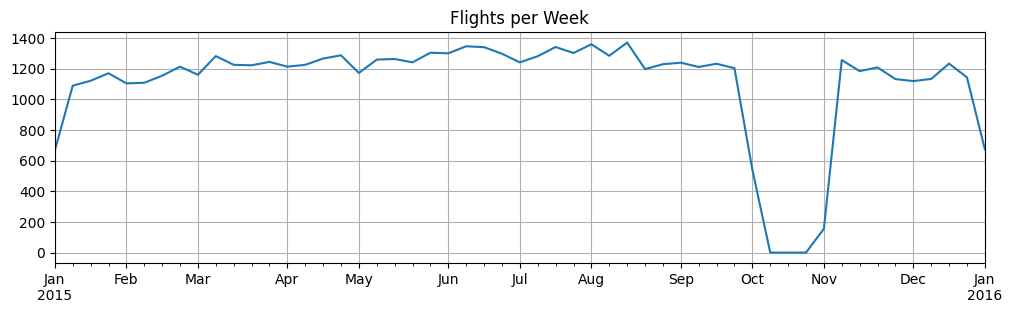

In [ ]:
flights.index = flight_dep
fc=flights.resample('W').size()
fc.plot(figsize=(12,3), title='Flights per Week', grid=True)


AttributeError: 'Annotation' object has no property 'arrowproprs'

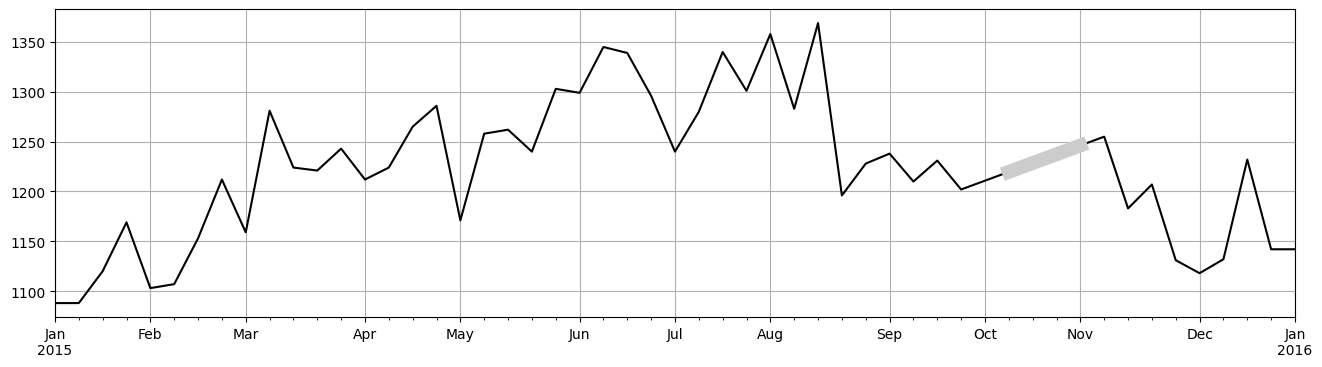

In [ ]:
fc_miss = fc.where(fc>1000)
fc_intp = fc_miss.interpolate(limit_direction='both') #Apply interpolate to fc_miss instead of fc.miss

ax = fc_intp.plot(color='black',figsize=(16,4))
fc_intp[fc < 500].plot(linewidth=10, grid=True,
                       color = '.8', ax=ax)

ax.annotate('missing data', xy=(.8,.55),xytext=(.8,.77),
            xycoords='axes fraction',
            ha='center', size=20,  arrowproprs=dict())

<Axes: title={'center': 'Average distance per destination'}, xlabel='DEST_AIR'>

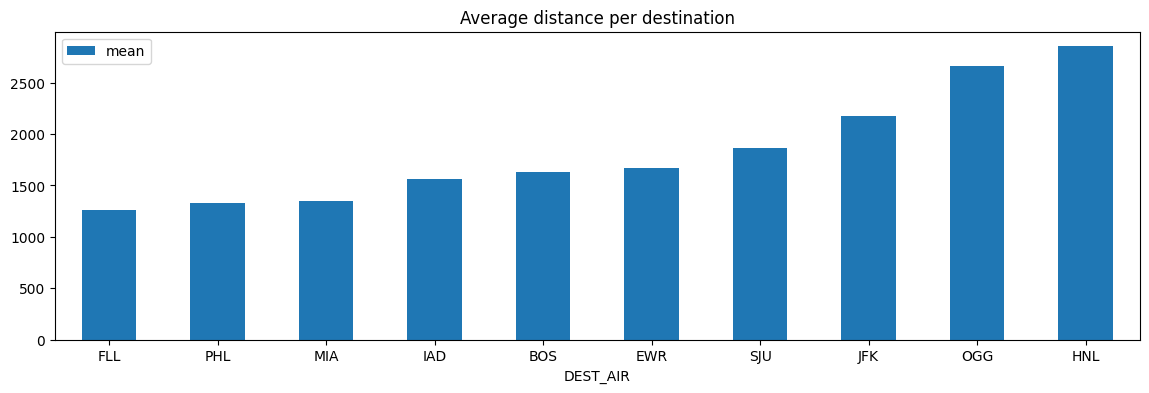

In [ ]:
#flight <
#.groupby('DEST_AIR')['DIST]
#.agg([['mean',count]])
#.query(count>100)
#sort _vlaue(mean)
#.tail(10)
#.plot(kde, y=mean) legend = false, rot=0, fig size 14,4 title = average distance per dest
flights.groupby('DEST_AIR')['DIST'].agg(['mean','count']).query('count>100').sort_values('mean').tail(10).plot(kind='bar', y = 'mean', legend = 'false', rot = 0, figsize=(14,4), title = 'Average distance per destination')